<a href="https://colab.research.google.com/github/tilakparth/Data_Science/blob/master/logistic%20regression/logistic_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

#####  Data Prepreation

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt

In [ ]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4.5,5.5])
cov_02 = np.array([[1.2,0.1],[.1,1.3]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

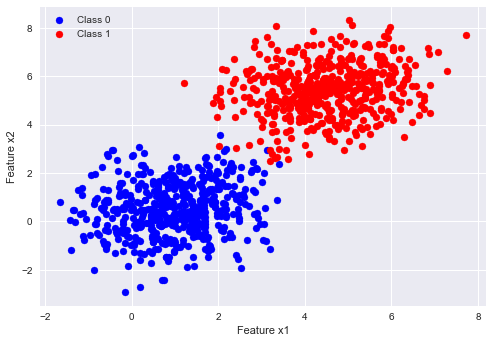

In [ ]:
plt.style.use("seaborn")
plt.scatter(dist_01[:,0],dist_01[:,1],color="blue",label="Class 0")
plt.scatter(dist_02[:,0],dist_02[:,1],color ="red",label="Class 1")
plt.legend()
plt.xlabel("Feature x1");
plt.ylabel("Feature x2")
plt.show()

In [ ]:
data = np.zeros((1000,3))
data[:500,:2] =dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1
np.random.shuffle(data)
### prepared the data

In [ ]:
split = int(0.8*data.shape[0])
x_train = data[:split,:-1]
y_train = data[:split,-1]
x_test = data[split:,:-1]
y_test = data[split:,-1]
# Prepared training and test data

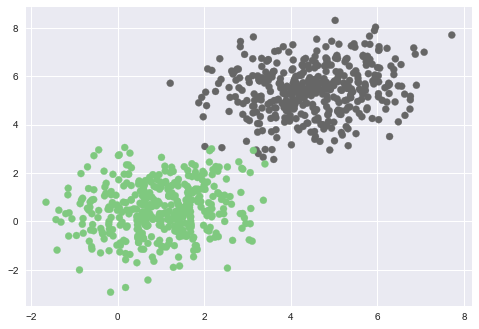

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)

In [ ]:
x_mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

In [ ]:
x_train = (x_train-x_mean)/std
#Normalised the data

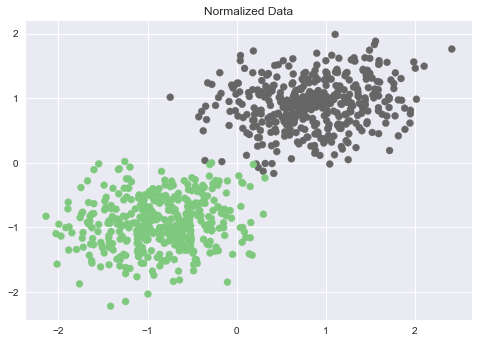

In [ ]:
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=plt.cm.Accent)
plt.title("Normalized Data")
plt.show()

In [ ]:
x_test = (x_test-x_mean)/std
#Normalize the test data with the same mean of train data

In [58]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,y,theta):
    y_hat = hypothesis(X,theta)
    loss = y*(np.log(y_hat)) + (1-y)*(np.log(1-y_hat))
    loss = -1*np.mean(loss)
    return loss

In [59]:
def gradient(X,y,theta):
    y_hat = hypothesis(X,theta)
    return np.dot(X.T,y-y_hat)/X.shape[0]
def gradient_descent(X,y,lr =0.1,max_itr =500):
    theta = np.zeros((X.shape[1],1))
    error_list = []
    for i in range(max_itr):
        error_list.append(error(X,y,theta))
        theta = theta + lr* gradient(X,y,theta)
    return theta,error_list    
def predict(X,theta):
    y_hat = hypothesis(X,theta)
    output = np.zeros(y_hat.shape)
    output[y_hat>.5]=1
    output = output.astype('int')
    return output
def accuracy(actual,preds):
    correct = np.sum(actual==preds)
    return correct/actual.shape[0]*100
    

In [ ]:
x_train_new= np.hstack((np.ones((x_train.shape[0],1)),x_train))
y_train =y_train.reshape((-1,1))

In [ ]:
theta,error_list = gradient_descent(x_train_new,y_train,0.5)

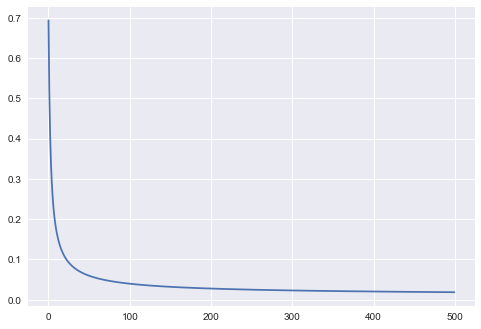

In [ ]:
plt.plot(error_list)

In [ ]:
x_test_new = np.hstack((np.ones((x_test.shape[0],1)),x_test))
y_test = y_test.reshape((-1,1))

In [ ]:
y_ans = predict(x_test_new,theta)
accuracy(y_ans,y_test)

99.5

In [ ]:
theta

array([[0.15660183],
       [3.21911662],
       [4.44591195]])

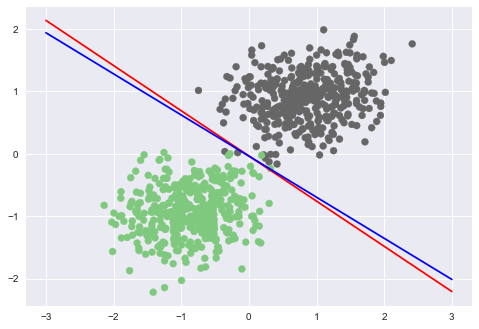

In [ ]:
x1 = np.arange(-3,4)
x2  = -(theta[0]+theta[1]*x1)/theta[2]
x3 = -(theta_0[0]+theta_s[0][0]*x1)/theta_s[0][1]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train.reshape((-1)),cmap=plt.cm.Accent)
plt.plot(x1,x2,color="red")
plt.plot(x1,x3,color="blue")
plt.show()

## Sk-learn

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train.reshape((-1)))

LogisticRegression()

In [ ]:
theta_0  = model.intercept_
theta_s = model.coef_
print(theta_0,theta_s)

[0.16281727] [[2.85595715 4.33550169]]


In [ ]:
model.score(x_test,y_test.reshape((-1)))

0.99

In [ ]:
# model.predict(x_test)

In [185]:
data = pd.read_csv("https://dvats.github.io/assets/data/180575.csv")
data
Y_train = data.iloc[:,0]
X_train = data.iloc[:,1:51]
Y_train = Y_train.values
X_train = X_train.values


AttributeError: ignored

In [174]:
s1 = "https://dvats.github.io/assets/data/"
s3 = ".csv"
count = 0
for i in range(180000,180900):
    try: 
        s2 = str(i)
        s = s1+s2 +s3
        data = pd.read_csv(s)
        X_temp = data.iloc[:,1:51]
        Y_temp = data.iloc[:,0]
        X_temp = X_temp.values
        Y_temp = Y_temp.values
        X_train = np.vstack((X_train,X_temp))
        Y_train = np.hstack((Y_train,Y_temp))
        count = count + 1
    except:
        continue

In [163]:
X_train = np.vstack((X_test,X_train))
Y_train = np.hstack((Y_test,Y_train))

In [175]:
X_train.shape,Y_train.shape,count

((81000, 50), (81000,), 80)

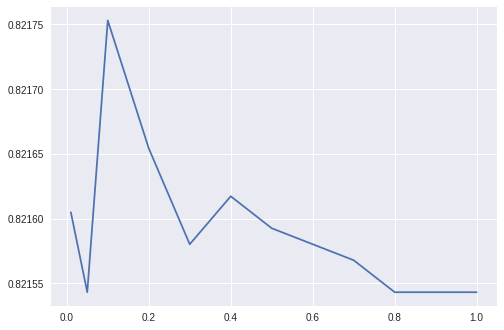

In [184]:
C = [0.01,0.05,0.1 , .2 ,.3 , .4 ,.5 , .6 , .7 ,.8 ,.9 , 1]
acc_test = []
acc_train = []
for i in C:
    model2 = LogisticRegression(fit_intercept=False ,C = i)
    model2.fit(X_train,Y_train.reshape((-1)))
    # acc_test.append(model2.score(X_test,Y_test))
    acc_train.append(model2.score(X_train,Y_train))
plt.style.use("seaborn")
plt.plot(C,acc_train)

In [186]:
model2.fit(X_train,Y_train.reshape((-1)))

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
Y_ans = model2.predict(X_train)

In [187]:
model2.coef_

array([[ 1.20610524e-01,  1.37246948e-01, -6.27261218e-01,
         1.55956750e-01,  1.52212454e-02, -9.68277955e-02,
        -2.14090292e-01, -1.02543479e-01,  3.40745571e-01,
        -5.87476148e-02, -3.26919551e-01, -3.61250230e-01,
         3.23330383e-01,  3.38864053e-02,  2.01806600e-01,
         2.69881945e-01, -2.07733450e-01,  3.79846266e-01,
        -3.23365194e-01, -6.74764806e-03, -3.58291368e-01,
         9.29199046e-02,  1.09726127e+00, -3.22496922e-01,
         7.45614390e-03,  7.83821333e-01, -8.13608856e-01,
         5.39731746e-01,  2.67305302e-02,  3.06716743e-01,
         5.31013063e-01,  9.64813036e-02, -5.84816616e-02,
        -3.08154825e-01, -1.09897287e-01,  1.01695234e+00,
         2.88414854e-01,  8.81631840e-02, -2.28924762e-01,
         9.11541604e-02,  6.98531290e-02, -4.74411380e-01,
         3.33298039e-01, -2.57777060e-01,  8.21235694e-01,
         1.85247278e-01, -2.56435171e-01, -8.25642777e-04,
        -2.65354357e-01, -1.36683118e-01]])

In [188]:
model2.score(X_test,Y_test)

0.803

In [189]:
model2.score(X_train,Y_train)

0.842

In [179]:
theta = model2.coef_
theta = theta.reshape((-1))

In [181]:
y_test_ans = predict(X_train,theta)
sum(y_test_ans == Y_train)/Y_train.shape[0]

0.8215432098765432

In [182]:
X_train.shape

(81000, 50)